In [5]:
import qiskit
import numpy as np, matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../')
import qtm.base, qtm.constant, qtm.nqubit, qtm.onequbit, qtm.fubini_study

In [37]:
num_qubits = 3
num_layers = 3
psi = 2*np.random.rand(2**num_qubits)-1
psi = psi / np.linalg.norm(psi)
qc_origin = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc_origin.initialize(psi, range(0, num_qubits))
thetas_origin = np.ones((num_layers*num_qubits*3))

In [38]:
qc = qc_origin.copy()
thetas = thetas_origin.copy()
thetas, loss_values_sgd = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.sgd,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 100/100 [13:06<00:00,  7.86s/it]


In [39]:
qc = qc_origin.copy()
thetas = thetas_origin.copy()
thetas, loss_values_adam = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.adam,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 100/100 [13:23<00:00,  8.04s/it]


In [40]:
qc = qc_origin.copy()
thetas = thetas_origin.copy()
thetas, loss_values_qfsm = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.qng_fubini_study,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 100/100 [16:17<00:00,  9.78s/it]


In [41]:
qc = qc_origin.copy()
thetas = thetas_origin.copy()
thetas, loss_values_qfim = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.qng_qfim,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 100/100 [19:53<00:00, 11.94s/it]


In [42]:
qc = qc_origin.copy()
thetas = thetas_origin.copy()
thetas, loss_values_adam_qfim = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.qng_adam,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 100/100 [14:51<00:00,  8.91s/it]


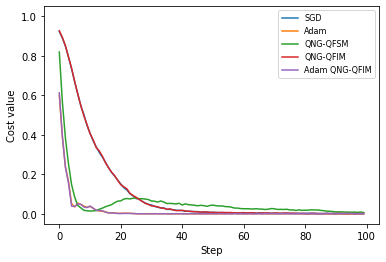

In [48]:
plt.plot(loss_values_sgd, label="SGD")
plt.plot(loss_values_adam, label="Adam")
plt.plot(loss_values_qfsm, label="QNG-QFSM")
plt.plot(loss_values_qfim, label="QNG-QFIM")
plt.plot(loss_values_adam_qfim, label="Adam QNG-QFIM")
plt.xlabel("Step")
plt.ylabel("Cost value")
plt.ylim(-0.05, 1.05)
plt.legend(prop={'size': 8}, loc=1)
plt.savefig(str(num_qubits) + '.svg', format='svg')
plt.show()